In [150]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd
from pydataset import data

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle, wrangle_mode
from acquire import acquire
from functions import create_heatmap, explore_univariate, explore_bivariate, explore_multivariate
import warnings
warnings.filterwarnings("ignore")

# Planning

#### Setup

- Create a repo
- Create a README.md
- Update .gitignore
- Create a draft and final in juypter notebook

#### Acquire

- Create an acquire.py module
- Create a sql script
- Setup acquire.py
- Use python to grab the data from codeup database
- plot distributions
- Run .head(), .info(), .describe()

#### Prepare

- Create a prepare.py module

- Clean data()
   - Drop columns
       - Document why I dropped columns
   - Handle nulls
       - Documnet which columns/rows will be dropped.
       - Impute? document how and why
   - Check datatypes
   - Check for duplicates
   - Rename columns
   
- Remove outliers()
    
- Split Data for modeling()
    - Encode()
        - Create dummies
        - Scale Data on Train
        - Transform Train, Validate, Test
        
- Split Data for exploration()
    - No encoding
    
#### Explore

- Ask and answer as many questions as i can
- heatmap
- convert some continous values to categorical
- univariate, bivariate
- initial hypothesis
- hypothesis testing
    - T-Test
    - Correlation
- feature engineering
- clustering
    - Try out different features
        - Graph clusters
        - graph k using inertia

#### Model
- For each cluster
    - Run as many linear regression models as i can.
        - Change out features
            - Document
        - Change out hyperparameters
            - Document
    - Select best model
         - Compare Validate and Train rmse and look for drop offs
         - plot residuals
    - Run test
    
#### Deliver
- Create a data dictionary
- Finish up final notebook
- Finish up READ.me

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")

# Explore

In [3]:
train, validate, test = wrangle_mode('intial_explore') # nothing is scaled

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29182 entries, 47145 to 43370
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            29182 non-null  float64
 1   bed             29182 non-null  float64
 2   area            29182 non-null  float64
 3   lat             29182 non-null  float64
 4   long            29182 non-null  float64
 5   lot_size        29182 non-null  float64
 6   year            29182 non-null  float64
 7   tax_value       29182 non-null  float64
 8   tax_amount      29182 non-null  float64
 9   logerror        29182 non-null  float64
 10  heating_type    29182 non-null  object 
 11  county          29182 non-null  object 
 12  price_per_sqft  29182 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.1+ MB


<AxesSubplot:>

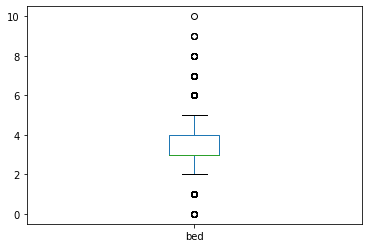

In [5]:
train.bed.plot.box()

Looks like 2 to 5 bed rooms is the average range for bedrooms

<AxesSubplot:>

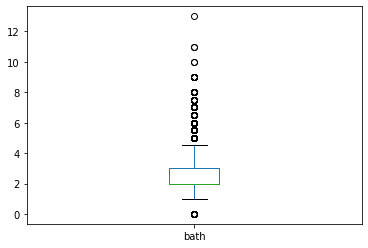

In [6]:
train.bath.plot.box()

<AxesSubplot:>

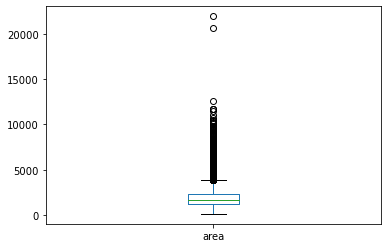

In [7]:
train.area.plot.box()

<AxesSubplot:>

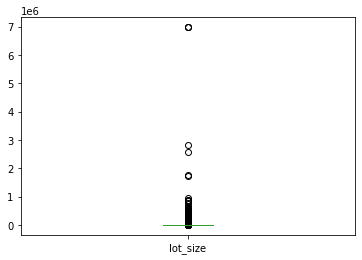

In [8]:
train.lot_size.plot.box()

<AxesSubplot:>

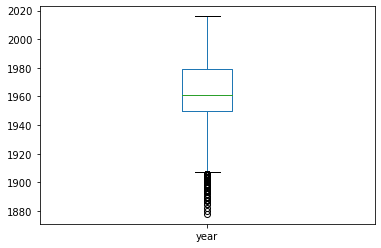

In [9]:
train.year.plot.box()

<AxesSubplot:>

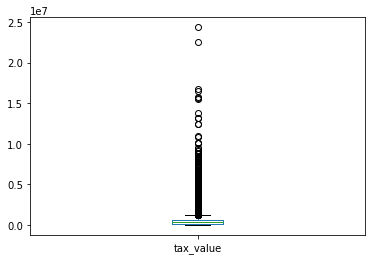

In [10]:
train.tax_value.plot.box()

<AxesSubplot:>

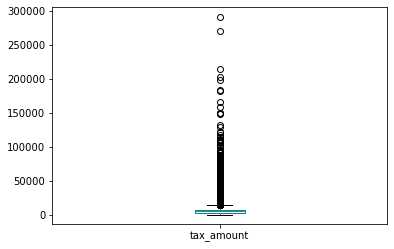

In [11]:
train.tax_amount.plot.box()

## Questions

### Do the houses under the year 1912 have more area than houses above 1912? worth more?`

In [12]:
df_over_1912 = train[train['year']> 1912]

In [13]:
df_under_1912 = train[train['year']< 1912]

In [14]:
df_under_1912.area.mean(), df_under_1912.tax_value.mean()

(1564.4186046511627, 356119.9767441861)

In [15]:
df_over_1912.area.mean(), df_over_1912.tax_value.mean()

(1930.3569963497305, 528207.401251521)

#### `Houses under 1912 on average are smaller and worth more money`


### What county has the most houses under 1912?

In [16]:
df_under_1912.county.value_counts()

Los Angeles    322
Orange          15
Ventura          7
Name: county, dtype: int64

#### `LA has the most houses made under the year 1912`

In [17]:
df_over_1912.county.value_counts()

Los Angeles    18399
Orange          7939
Ventura         2427
Name: county, dtype: int64

### What county on average has a  logerror?

In [18]:
train.groupby("county").logerror.mean()

county
Los Angeles    0.016114
Orange         0.023558
Ventura        0.014337
Name: logerror, dtype: float64

In [19]:
train.groupby("county").logerror.median()

county
Los Angeles    0.006804
Orange         0.007825
Ventura        0.005227
Name: logerror, dtype: float64

### What heating type has a higher on average logeror?

In [20]:
train.groupby("heating_type").logerror.mean()

heating_type
Central       0.018752
Floor/Wall    0.016255
Forced air    0.002682
Name: logerror, dtype: float64

In [21]:
train.groupby("heating_type").logerror.median()

heating_type
Central       0.007373
Floor/Wall    0.005630
Forced air    0.005630
Name: logerror, dtype: float64

### What is the range in years?

In [22]:
train.year.min(), train.year.max()

(1878.0, 2016.0)

### Which county has the largest tax value houses? 

In [23]:
train.groupby('county').tax_value.max()

county
Los Angeles    24345695.0
Orange          8020475.0
Ventura         4732000.0
Name: tax_value, dtype: float64

In [24]:
train.groupby('county').tax_value.min()

county
Los Angeles    10504.0
Orange         13817.0
Ventura         9242.0
Name: tax_value, dtype: float64

In [25]:
train.groupby('county').tax_value.median()

county
Los Angeles    320180.5
Orange         476269.0
Ventura        443591.5
Name: tax_value, dtype: float64

In [26]:
train.groupby('county').tax_value.mean()

county
Los Angeles    496274.299308
Orange         598784.330611
Ventura        513848.030403
Name: tax_value, dtype: float64

### what county has bigger lots?

In [27]:
train.groupby('county').lot_size.mean()

county
Los Angeles    12576.540926
Orange          7382.580045
Ventura        12807.225965
Name: lot_size, dtype: float64

In [28]:
train.groupby('county').lot_size.median()

county
Los Angeles    6894.0
Orange         6371.5
Ventura        7488.5
Name: lot_size, dtype: float64

In [29]:
train.groupby('county').lot_size.max()

county
Los Angeles    6971010.0
Orange          169884.0
Ventura         482209.0
Name: lot_size, dtype: float64

In [30]:
train.groupby('county').lot_size.min()

county
Los Angeles    909.0
Orange         540.0
Ventura        236.0
Name: lot_size, dtype: float64

### how many house in LA have over a 1 million square feet?

In [31]:
df_la = train[train.county == "Los Angeles"]

In [32]:
df_la['price_per_sqft']= df_la.lot_size/df_la.tax_value

In [33]:
df_la[['lot_size', 'tax_value','price_per_sqft']].sort_values(by=['price_per_sqft'], ascending=False).head()

,lot_size,tax_value,price_per_sqft
53614,6971010.0,234191.0,29.766345
16575,6971010.0,263500.0,26.455446
61840,1774617.0,68310.0,25.978876
30189,6971010.0,295000.0,23.630542
52759,219917.0,26825.0,8.198211


#### `Lot_size over 6 million are an error, price per sqft over like 3 I need to look into and I need to check low tax_value homes`

#### `in the LA area, anyting over 2.5 price per sqft is an outlier`

<AxesSubplot:>

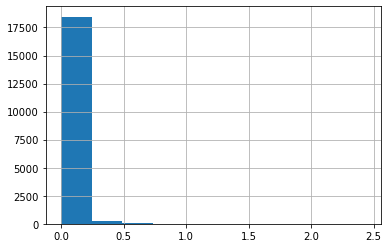

In [34]:
df_la[df_la['price_per_sqft'] <2.5].price_per_sqft.hist()

In [35]:
len(df_la[df_la['price_per_sqft'] >2.5])

26

In [36]:
len(train)

29182

<AxesSubplot:>

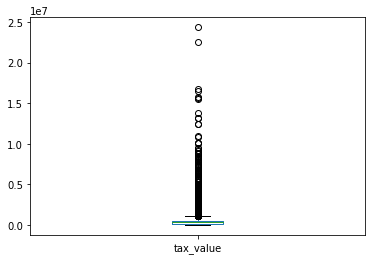

In [37]:
df_la.tax_value.plot.box()

In [38]:
# # Dropping extreme outliers 
# selRows = train[(train['price_per_sqft'] >2.5) & (train['county']=='Los Angeles')].index
# train = train.drop(selRows, axis=0)
# len(train)

In [39]:
train[['lot_size', 'tax_value','price_per_sqft', 'county']].sort_values(by=['lot_size'], ascending=False).head(30)

,lot_size,tax_value,price_per_sqft,county
30189,6971010.0,295000.0,23.630542,Los Angeles
16575,6971010.0,263500.0,26.455446,Los Angeles
53614,6971010.0,234191.0,29.766345,Los Angeles
63728,2831752.0,727000.0,3.895120,Los Angeles
68832,2562259.0,1336101.0,1.917714,Los Angeles
61840,1774617.0,68310.0,25.978876,Los Angeles
14081,1746019.0,259853.0,6.719257,Los Angeles
10720,941333.0,164685.0,5.715961,Los Angeles
26645,872645.0,2284312.0,0.382017,Los Angeles
31663,872158.0,198127.0,4.402015,Los Angeles


In [40]:
train.county.value_counts()

Los Angeles    18790
Orange          7958
Ventura         2434
Name: county, dtype: int64

# Orange county 

<AxesSubplot:>

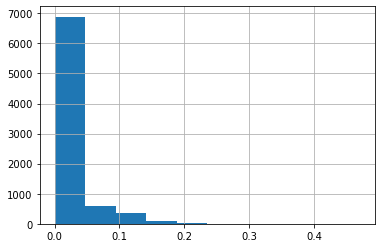

In [41]:
df_orange = train[train['county']=='Orange']
df_orange['price_per_sqft'].hist()

In [42]:
df_orange.price_per_sqft.median()

0.012835427733733897

In [43]:
len(df_orange)

7958

In [44]:
len(df_orange[df_orange.price_per_sqft >.08])

632

In [45]:
df_orange[['lot_size', 'tax_value','price_per_sqft']].sort_values(by=['price_per_sqft'], ascending=False).head()

,lot_size,tax_value,price_per_sqft
8619,6850.0,14577.0,0.469918
55224,74052.0,160220.0,0.462189
15453,32855.0,76353.0,0.430304
33392,19656.0,48107.0,0.408589
36966,24002.0,63304.0,0.379155


<AxesSubplot:>

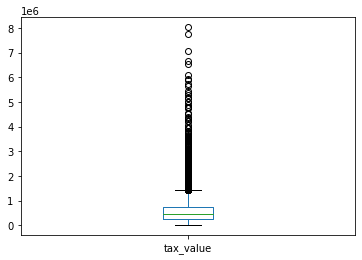

In [46]:
df_orange.tax_value.plot.box()

In [47]:
df_orange.tax_value.min(), df_orange.tax_value.max(), df_orange.tax_value.mean(), df_orange.tax_value.median()

(13817.0, 8020475.0, 598784.3306107062, 476269.0)

In [48]:
# found this record with an 11million dollar value,
df_orange.tax_value.idxmax()

22008

<AxesSubplot:>

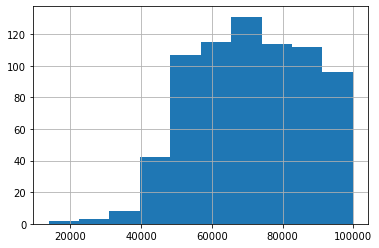

In [49]:
# Checking to see if there are any typos in the lower end of tax values
df_orange[df_orange.tax_value < 100000].tax_value.hist()

### `Removing houses in orange county where tax value is less than 55_000

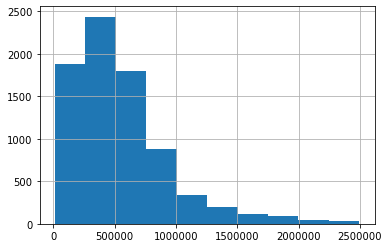

In [50]:
plt = df_orange[df_orange.tax_value < 2500000].tax_value.hist()
plt.ticklabel_format(style = 'plain')

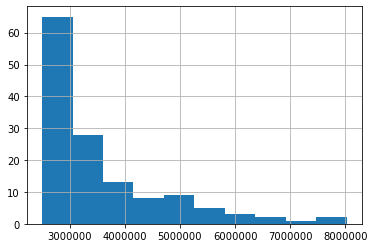

In [51]:
plt = df_orange[df_orange.tax_value > 2500000].tax_value.hist()
plt.ticklabel_format(style = 'plain')

In [52]:
# might want to remove these 981 rows of houses worth more than 1 million.  I'll keep them for now
len(df_orange[df_orange.tax_value > 1000000])

984

# Ventura

In [53]:
train.county.value_counts()

Los Angeles    18790
Orange          7958
Ventura         2434
Name: county, dtype: int64

<AxesSubplot:>

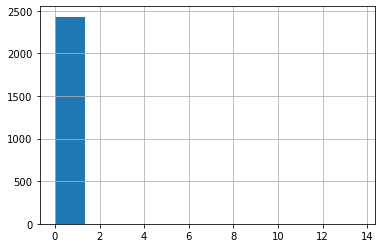

In [54]:
df_ven = train[train['county']=='Ventura']
df_ven['price_per_sqft'].hist()

In [55]:
# Looking for typo erros in price per sq ft
df_ven['price_per_sqft'].sort_values(ascending=False).head(10)

54611    13.645236
32996     1.620990
50233     0.707508
22208     0.687012
26969     0.620141
27733     0.616518
73405     0.562649
76350     0.388348
52382     0.348451
10310     0.332656
Name: price_per_sqft, dtype: float64

In [56]:
df_ven[df_ven['price_per_sqft'] > .16]

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county,price_per_sqft
22208,2.0,4.0,1215.0,34262160.0,-118921436.0,43560.0,1976.0,63405.0,703.28,-0.104823,Central,Ventura,0.687012
47574,2.0,4.0,1559.0,34259082.0,-119191161.0,9772.0,1966.0,61005.0,684.06,0.206130,Central,Ventura,0.160184
62948,1.0,3.0,1143.0,34365301.0,-119055251.0,6000.0,1959.0,37307.0,488.12,0.176272,Central,Ventura,0.160828
72151,1.0,3.0,1144.0,34341365.0,-119086787.0,8998.0,1952.0,50092.0,579.36,0.124880,Central,Ventura,0.179629
1002,2.0,4.0,1795.0,34235428.0,-119172609.0,16291.0,1955.0,65437.0,725.90,0.254430,Central,Ventura,0.248957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,2.0,4.0,1311.0,34439054.0,-119295678.0,9552.0,1961.0,51677.0,1186.32,0.006837,Central,Ventura,0.184840
6640,2.0,3.0,1688.0,34222291.0,-118862033.0,21405.0,1961.0,70421.0,772.56,0.041310,Central,Ventura,0.303958
44380,2.0,3.0,1677.0,34293666.0,-118856116.0,15537.0,1973.0,80024.0,928.82,0.324139,Central,Ventura,0.194154
50233,0.0,3.0,2684.0,34293459.0,-119055024.0,101059.0,1964.0,142838.0,1563.64,0.083684,Central,Ventura,0.707508


#### `Removing price_per_sqt > .16 for ventura`

In [57]:
len(df_ven[df_ven.tax_value < 55000].tax_value)

61

<AxesSubplot:>

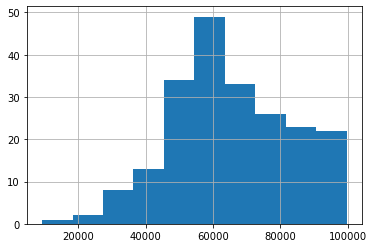

In [58]:
df_ven[df_ven.tax_value < 100000].tax_value.hist()

#### `Drop ven tax value < 55_000`

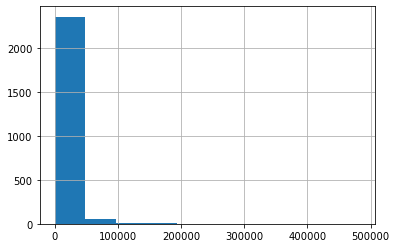

In [59]:
plt = df_ven.lot_size.hist()
plt.ticklabel_format(style = 'plain')

In [60]:
# checking small lots sizes.  Here is a group of houses built in the 70's price per sqft matches, keeping all these values
df_ven[df_ven['lot_size'] < 1_700]

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county,price_per_sqft
8535,2.0,2.0,961.0,34220057.0,-118993652.0,1584.0,1977.0,305998.0,3297.86,0.050132,Central,Ventura,0.005177
67001,3.0,3.0,2465.0,34262193.0,-118727145.0,236.0,2001.0,536798.0,6141.94,-0.061405,Central,Ventura,0.000440


In [61]:
# checking ventura lot_size

df_ven[df_ven['lot_size'] > 250_000] 

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county,price_per_sqft
10310,2.0,4.0,2034.0,34295524.0,-118960502.0,292072.0,1936.0,878000.0,9557.48,-0.025770,Central,Ventura,0.332656
29993,3.5,4.0,4464.0,34252739.0,-118920081.0,287496.0,1992.0,1406936.0,15162.14,-0.009336,Central,Ventura,0.204342
27706,5.5,4.0,6864.0,34169761.0,-118804429.0,439956.0,2003.0,2919184.0,31640.58,-0.042657,Central,Ventura,0.150712
66078,6.5,5.0,6743.0,34251742.0,-118871155.0,440392.0,1996.0,1431291.0,15358.20,-0.043156,Central,Ventura,0.307689
24644,2.5,4.0,3379.0,34254240.0,-118915588.0,360560.0,1988.0,1232000.0,13334.14,0.134393,Central,Ventura,0.292662
59114,4.5,5.0,1120.0,34103059.0,-118943081.0,390733.0,2004.0,1461048.0,15893.18,0.339257,Central,Ventura,0.267433
54611,1.0,2.0,768.0,34260421.0,-118994956.0,482209.0,1971.0,35339.0,484.04,0.055792,Central,Ventura,13.645236


In [62]:
# Checking ventura tax value

In [63]:
# Checking ventura tax value
df_ven[df_ven['tax_value'] > 3_500_000]

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county,price_per_sqft
27141,7.5,5.0,8531.0,34126136.0,-118880549.0,27098.0,2000.0,4112590.0,43858.62,0.095418,Central,Ventura,0.006589
70928,6.5,6.0,9660.0,34181495.0,-118804362.0,59242.0,1993.0,4732000.0,50548.12,0.114581,Central,Ventura,0.012519
59423,4.5,4.0,5590.0,34127225.0,-118881865.0,21901.0,2004.0,3547427.0,37840.00,0.069362,Central,Ventura,0.006174


In [64]:
# checking ventura price per sqft on smaller ends

In [65]:
df_ven[df_ven['price_per_sqft'] < .0035].head()

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county,price_per_sqft
56002,2.0,3.0,1905.0,34150577.0,-119215138.0,2450.0,1952.0,811184.0,9067.58,0.001150,Central,Ventura,0.003020
72781,3.0,3.0,2770.0,34173045.0,-119232570.0,2450.0,2003.0,728342.0,8145.30,0.048526,Central,Ventura,0.003364
24307,3.0,6.0,2954.0,34257505.0,-119265149.0,4500.0,1965.0,1435521.0,15056.66,-0.037251,Central,Ventura,0.003135
7802,3.0,3.0,2178.0,34173169.0,-119233354.0,2625.0,1988.0,1893224.0,21315.70,-0.167552,Central,Ventura,0.001387
32931,2.5,3.0,2547.0,34161488.0,-119225434.0,2183.0,2001.0,1221866.0,13762.34,0.409077,Central,Ventura,0.001787


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29182 entries, 47145 to 43370
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            29182 non-null  float64
 1   bed             29182 non-null  float64
 2   area            29182 non-null  float64
 3   lat             29182 non-null  float64
 4   long            29182 non-null  float64
 5   lot_size        29182 non-null  float64
 6   year            29182 non-null  float64
 7   tax_value       29182 non-null  float64
 8   tax_amount      29182 non-null  float64
 9   logerror        29182 non-null  float64
 10  heating_type    29182 non-null  object 
 11  county          29182 non-null  object 
 12  price_per_sqft  29182 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.1+ MB


# Explore by county Take aways

### Ventura 

- Removing Ventura lots_size > than 250_000
- Leaving Ventura lots_size on the smaller ends 

- Leaving Ventura Tax Value on the higher ends
- Removing Ventura Tax Value < 55_000

- Removing Ventura price_per_sqft > .16
- Leaving Ventura price_per_sqft on the lower ends 

### Orange county

- Removing Orange County lot_size >
- Removing Orange County lot_size <

- Removing Orange County tax_value > 2_000_000
- Removing Orange County tax_value < 55_000

- Removing Orange County price_per_sqft > .08
- Leaving Orange County price_per_sqft  on the lower ends

### LA

- Removing LA lot_size >
- Removing LA lot_size <

- Removing LA tax_value >
- Removing LA tax_value <

- Removing LA price_per_sqft > 2.5
- Removing LA price_per_sqft < 

In [67]:
# #Ventura
# selRows = train[(train['lot_size'] > 250_000) & (train['county']=='Ventura')].index
# train = train.drop(selRows, axis=0)

# selRows = train[(train['tax_value'] < 55_000) & (train['county']=='Ventura')].index
# train = train.drop(selRows, axis=0)

# selRows = train[(train['price_per_sqft'] > .16) & (train['county']=='Ventura')].index
# train = train.drop(selRows, axis=0)

In [68]:
# #Orange County
# selRows = train[(train['tax_value'] > 2_000_000) & (train['county']=='Orange')].index           
# train = train.drop(selRows, axis=0)

# selRows = train[(train['tax_value'] < 55_000) & (train['county']=='Orange')].index           
# train = train.drop(selRows, axis=0)

# selRows = train[(train['price_per_sqft'] > .08) & (train['county']=='Orange')].index           
# train = train.drop(selRows, axis=0)

# Hypothesis Testing

In [69]:
alpha = .05

State Hypotheses**

$H_{0}$: population means of the price per square feet for the three counties, Orange, Ventura & Los Angeles, are all equal.  

$H_{a}$: population means of the price per square feet for the three counties, Orange, Ventura & Los Angeles, are NOT all equal. 

### Checking distributions

<AxesSubplot:>

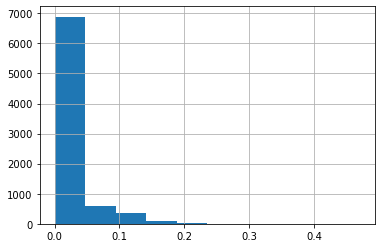

In [70]:
train[train['county']=='Orange'].price_per_sqft.hist()

<AxesSubplot:>

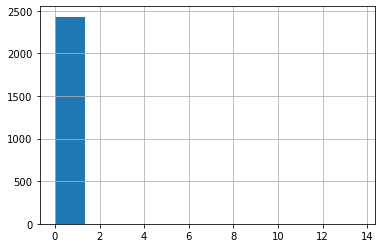

In [71]:
train[train['county']=='Ventura'].price_per_sqft.hist()

<AxesSubplot:>

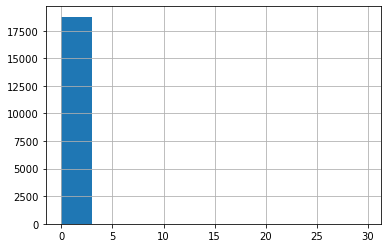

In [72]:
train[train['county']=='Los Angeles'].price_per_sqft.hist()

In [73]:
orange_mean = train[train['county']=='Orange'].price_per_sqft.mean()
ventura_mean = train[train['county']=='Ventura'].price_per_sqft.mean()
la_mean = train[train['county']=='Los Angeles'].price_per_sqft.mean()

In [74]:
orange_mean, ventura_mean, la_mean

(0.024982980685200742, 0.041229158408873125, 0.057041158868416014)

In [75]:
orange_mean = train[train['county']=='Orange'].price_per_sqft
ventura_mean = train[train['county']=='Ventura'].price_per_sqft
la_mean = train[train['county']=='Los Angeles'].price_per_sqft

In [76]:
# used a kruskal because distributions weren't normal
f, p = stats.kruskal(orange_mean, ventura_mean, la_mean)

In [77]:
f, p

(1991.3480388058108, 0.0)

In [78]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


State Hypotheses**

$H_{0}$: population means of the tax value for the three counties, Orange, Ventura & Los Angeles, are all equal.  

$H_{a}$: population means of the tax value feet for the three counties, Orange, Ventura & Los Angeles, are NOT all equal. 

In [79]:
orange_tax_value = train[train['county']=='Orange'].tax_value
ventura_tax_value = train[train['county']=='Ventura'].tax_value
la_tax_value = train[train['county']=='Los Angeles'].tax_value

<AxesSubplot:>

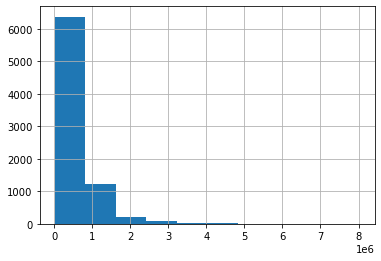

In [80]:
orange_tax_value.hist()

<AxesSubplot:>

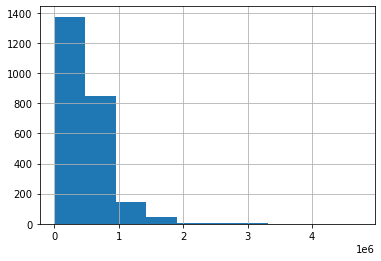

In [81]:
ventura_tax_value.hist()

<AxesSubplot:>

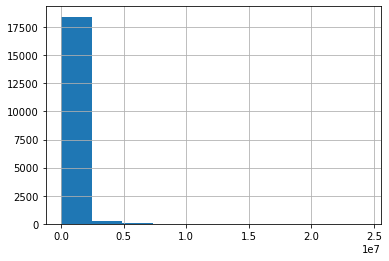

In [82]:
la_tax_value.hist()

In [83]:
f, p = stats.kruskal(orange_tax_value, ventura_tax_value, la_tax_value)

In [84]:
f, p

(1027.962375675702, 6.036793495878407e-224)

In [85]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29182 entries, 47145 to 43370
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            29182 non-null  float64
 1   bed             29182 non-null  float64
 2   area            29182 non-null  float64
 3   lat             29182 non-null  float64
 4   long            29182 non-null  float64
 5   lot_size        29182 non-null  float64
 6   year            29182 non-null  float64
 7   tax_value       29182 non-null  float64
 8   tax_amount      29182 non-null  float64
 9   logerror        29182 non-null  float64
 10  heating_type    29182 non-null  object 
 11  county          29182 non-null  object 
 12  price_per_sqft  29182 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.1+ MB


# Clusterings

In [87]:
quant_vars = ['bath', 'bed', 'area', 'lot_size', 'year', 'tax_value', 'tax_amount', 'price_per_sqft']
cat_vars=['county', 'heating_type']
target = 'logerror'

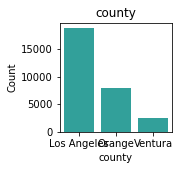

                  county  Count  Percent
Los Angeles  Los Angeles  18790    64.39
Orange            Orange   7958    27.27
Ventura          Ventura   2434     8.34
_________________________________________________________________


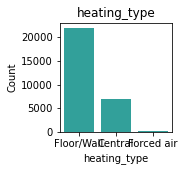

           heating_type  Count  Percent
Central      Floor/Wall  21932    75.16
Floor/Wall      Central   6959    23.85
Forced air   Forced air    291     1.00
_________________________________________________________________


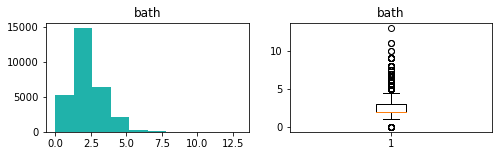

count    29182.000000
mean         2.306799
std          1.020635
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bath, dtype: float64


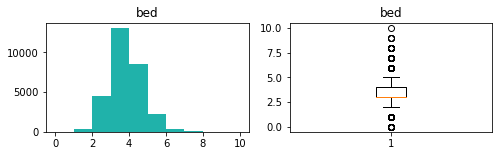

count    29182.000000
mean         3.309746
std          0.935997
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bed, dtype: float64


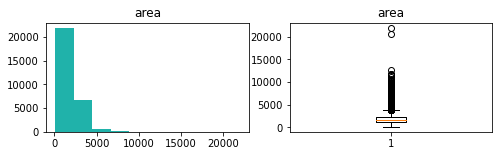

count    29182.000000
mean      1924.889110
std        995.970421
min        128.000000
25%       1269.000000
50%       1665.000000
75%       2309.000000
max      21929.000000
Name: area, dtype: float64


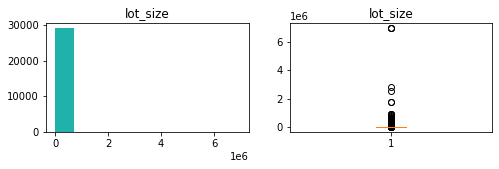

count    2.918200e+04
mean     1.117938e+04
std      7.908429e+04
min      2.360000e+02
25%      5.596000e+03
50%      6.818000e+03
75%      8.731750e+03
max      6.971010e+06
Name: lot_size, dtype: float64


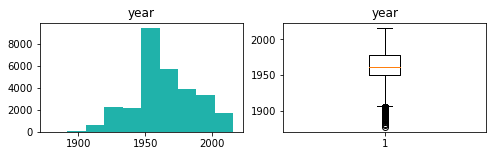

count    29182.000000
mean      1963.475464
std         23.170459
min       1878.000000
25%       1950.000000
50%       1961.000000
75%       1979.000000
max       2016.000000
Name: year, dtype: float64


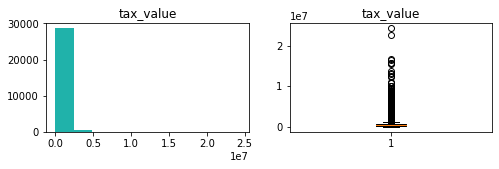

count    2.918200e+04
mean     5.256948e+05
std      6.996639e+05
min      9.242000e+03
25%      1.915370e+05
50%      3.741400e+05
75%      6.208902e+05
max      2.434570e+07
Name: tax_value, dtype: float64


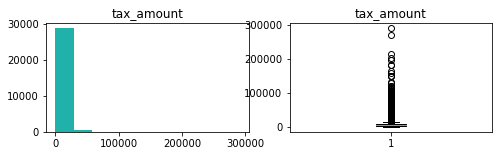

count     29182.000000
mean       6400.767593
std        8151.558950
min          85.000000
25%        2629.470000
50%        4643.340000
75%        7402.990000
max      290998.060000
Name: tax_amount, dtype: float64


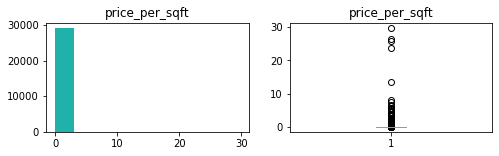

count    29182.000000
mean         0.046980
std          0.355464
min          0.000304
25%          0.011110
50%          0.019141
75%          0.040556
max         29.766345
Name: price_per_sqft, dtype: float64


In [88]:
explore_univariate(train, cat_vars, quant_vars)

In [89]:
# nothing fruitful here
# explore_bivariate(train.sample(100), target, cat_vars, quant_vars)

In [90]:
cols=['bath', 'bed', 'area', 'lot_size', 'year', 'tax_value', 'tax_amount', 'price_per_sqft']

In [91]:
cols[0]

'bath'

In [92]:
X = train[cols]

In [93]:
scaler = MinMaxScaler().fit(X)

In [94]:
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [95]:
print(X_scaled.head().to_markdown())

|       |      bath |   bed |      area |    lot_size |     year |   tax_value |   tax_amount |   price_per_sqft |
|------:|----------:|------:|----------:|------------:|---------:|------------:|-------------:|-----------------:|
| 47145 | 0.0769231 |   0.2 | 0.0315582 | 0.000854424 | 0.471014 |  0.00155996 |   0.00228329 |      0.00439647  |
| 42533 | 0.230769  |   0.5 | 0.10417   | 0.000652582 | 0.847826 |  0.045585   |   0.0429739  |      0.000133482 |
|  8452 | 0.153846  |   0.3 | 0.0560066 | 0.000495497 | 0.688406 |  0.00959076 |   0.0097106  |      0.000500668 |
| 51842 | 0.153846  |   0.3 | 0.0569699 | 0.000953122 | 0.681159 |  0.0222745  |   0.0192994  |      0.000409012 |
| 13230 | 0.153846  |   0.3 | 0.0540342 | 0.000653443 | 0.789855 |  0.0228364  |   0.022968   |      0.000274651 |


In [96]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 1, 0, ..., 1, 2, 0], dtype=int32)

In [97]:
train['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [98]:
print(train.sample(10).cluster.to_markdown())

|       |   cluster |
|------:|----------:|
| 20675 |         2 |
| 33801 |         0 |
|  3390 |         0 |
|  2260 |         0 |
|  6931 |         2 |
| 32789 |         1 |
| 12554 |         0 |
|  5831 |         2 |
| 16055 |         2 |
| 18340 |         0 |


In [99]:
#[['bath', 'bed', 'area', 'lot_size', 'year', 'tax_value', 'tax_amount', 'price_per_sqft']]

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29182 entries, 47145 to 43370
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            29182 non-null  float64
 1   bed             29182 non-null  float64
 2   area            29182 non-null  float64
 3   lat             29182 non-null  float64
 4   long            29182 non-null  float64
 5   lot_size        29182 non-null  float64
 6   year            29182 non-null  float64
 7   tax_value       29182 non-null  float64
 8   tax_amount      29182 non-null  float64
 9   logerror        29182 non-null  float64
 10  heating_type    29182 non-null  object 
 11  county          29182 non-null  object 
 12  price_per_sqft  29182 non-null  float64
 13  cluster         29182 non-null  int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 3.2+ MB


In [102]:
cols=['bath', 'bed']

In [107]:
X = train[['bath', 'bed']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.bath.sample(150), subset.bed.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
plt.legend()
plt.xlabel('price_per_sqft')
plt.ylabel('tax_value')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('county'):
    plt.scatter(subset.bath.sample(150), subset.bed.sample(150), label=str(cluster), alpha=.5)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('price_per_sqft')
plt.ylabel('tax_value')
plt.title('Visualizing counties')
plt.show()


centroids = train.groupby('cluster')[cols].mean()
centroids
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.bath.sample(150), subset.bed.sample(150), label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='bath', x='bed', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

TypeError: 'Figure' object is not callable

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29182 entries, 47145 to 43370
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            29182 non-null  float64
 1   bed             29182 non-null  float64
 2   area            29182 non-null  float64
 3   lat             29182 non-null  float64
 4   long            29182 non-null  float64
 5   lot_size        29182 non-null  float64
 6   year            29182 non-null  float64
 7   tax_value       29182 non-null  float64
 8   tax_amount      29182 non-null  float64
 9   logerror        29182 non-null  float64
 10  heating_type    29182 non-null  object 
 11  county          29182 non-null  object 
 12  price_per_sqft  29182 non-null  float64
 13  cluster         29182 non-null  int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 3.2+ MB


In [109]:
train, validate, test = wrangle_mode('intial_explore')

In [110]:
LA = train[train.county == 'Los Angeles']
LA["bracket"] = pd.cut(LA.tax_value, [0, 500_000, 1_000_000, 25_000_000], labels=["Low", "median", "high"])

In [111]:
['bath', 'bed', 'area', 'lot_size', 'year', 'tax_value', 'tax_amount', 'price_per_sqft']
cols=['tax_value', 'year']

In [112]:
LA.tax_value.min(), LA.tax_value.max(), LA.tax_value.median()

(10504.0, 24345695.0, 320180.5)

In [113]:
LA.head()

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county,price_per_sqft,bracket
47145,1.0,2.0,816.0,34159874.0,-118105208.0,6192.0,1943.0,47206.0,749.24,-0.100223,Floor/Wall,Los Angeles,0.131170,Low
13230,2.0,3.0,1306.0,33977024.0,-117850612.0,4791.0,1987.0,565000.0,6766.69,0.004758,Central,Los Angeles,0.008480,median
926,2.0,4.0,1236.0,34254021.0,-118416540.0,7500.0,1952.0,79584.0,1094.25,-0.002321,Floor/Wall,Los Angeles,0.094240,Low
41218,2.0,2.0,1382.0,33769979.0,-118417068.0,7015.0,1954.0,1177690.0,13812.47,0.002123,Central,Los Angeles,0.005957,high
10392,1.0,2.0,744.0,33978960.0,-118291418.0,2458.0,1924.0,206754.0,2575.31,-0.114342,Floor/Wall,Los Angeles,0.011889,Low


In [114]:
X = LA[['bath', 'area', 'lot_size', 'year', 'tax_value', 'tax_amount', 'price_per_sqft']]

In [115]:
X = LA[['area', 'price_per_sqft']]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
LA['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [116]:
plt.figure(figsize=(14, 9))
for cluster, subset in LA.groupby('cluster'):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

TypeError: 'Figure' object is not callable

In [117]:
plt.figure(figsize=(14, 9))
for cluster, subset in LA.groupby('bracket'):
    
    # Here
    plt.scatter(subset.area.sample(150), subset.tax_value.sample(150), label=str(cluster), alpha=.5)


plt.legend()
plt.xlabel('area')
plt.ylabel('tax_value')
plt.title('Visualizing counties')
plt.show()

TypeError: 'Figure' object is not callable

In [118]:
centroids = LA.groupby('cluster')['area', 'lot_size','tax_value'].mean()
centroids

,area,lot_size,tax_value
cluster,,,
0,2532.650157,14863.421691,6.662247e+05
1,4918.711679,31850.765207,2.203449e+06
2,1327.447667,10436.198834,3.196487e+05


In [119]:
plt.figure(figsize=(14, 9))
for cluster, subset in LA.groupby('cluster'):
    
    # Here
    plt.scatter(subset.area.sample(250), subset.lot_size.sample(250), label='cluster ' + str(cluster), alpha=.6)

    # Here
centroids.plot.scatter(y='lot_size', x='area', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('area')
plt.ylabel('lot size')
plt.title('Visualizing Cluster Centers')

TypeError: 'Figure' object is not callable

In [120]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

AttributeError: 'AxesSubplot' object has no attribute 'style'

# LA Clusters

In [121]:
LA.cluster.value_counts()

2    12860
0     5108
1      822
Name: cluster, dtype: int64

In [122]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [123]:
LA.groupby("cluster").tax_value.median()

cluster
0    509029.500
1   1479943.000
2    256910.000
Name: tax_value, dtype: float64

In [124]:
LA[LA.cluster == 0].lot_size.mean()

14863.42169146437

<AxesSubplot:>

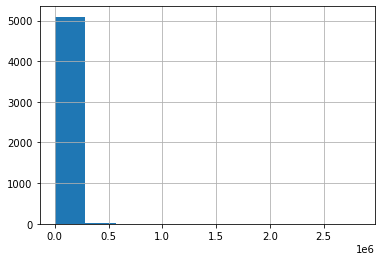

In [125]:
LA[LA.cluster == 0].lot_size.hist()

<AxesSubplot:>

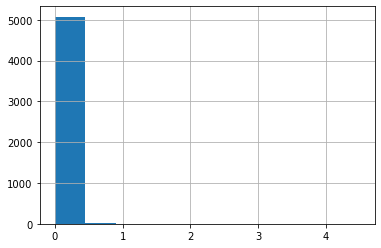

In [126]:
LA[LA.cluster == 0].price_per_sqft.hist()

### Going to use what learned from LA custers and see if it applies to the whole DF

In [127]:
train

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county,price_per_sqft
47145,1.000,2.000,816.000,34159874.000,-118105208.000,6192.000,1943.000,47206.000,749.240,-0.100,Floor/Wall,Los Angeles,0.131
42533,3.000,5.000,2399.000,33692471.000,-117800825.000,4785.000,1995.000,1118618.000,12586.680,0.013,Central,Orange,0.004
8452,2.000,3.000,1349.000,33672955.000,-117991743.000,3690.000,1973.000,242647.000,2909.940,0.065,Forced air,Orange,0.015
51842,2.000,3.000,1370.000,33625761.000,-117668032.000,6880.000,1972.000,551324.000,5699.440,0.013,Central,Orange,0.012
13230,2.000,3.000,1306.000,33977024.000,-117850612.000,4791.000,1987.000,565000.000,6766.690,0.005,Central,Los Angeles,0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21460,2.000,3.000,1500.000,34167209.000,-118938046.000,7422.000,1971.000,548830.000,5794.060,-0.020,Central,Ventura,0.014
39892,2.000,2.000,952.000,34276243.000,-118898023.000,4260.000,1984.000,215180.000,2455.160,0.040,Central,Ventura,0.020
48122,3.500,4.000,3383.000,33722740.000,-117753319.000,8400.000,1996.000,646415.000,8192.920,0.014,Central,Orange,0.013
26163,1.000,3.000,1180.000,34218261.000,-118510278.000,6056.000,1951.000,473106.000,5685.680,-0.004,Floor/Wall,Los Angeles,0.013


In [128]:
X = train[["area", "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [129]:
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

TypeError: 'Figure' object is not callable

In [130]:
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('county'):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label=str(cluster), alpha=.5)


plt.legend()
plt.xlabel('area')
plt.ylabel('tax_value')
plt.title('Visualizing counties')
plt.show()

TypeError: 'Figure' object is not callable

# Removing more Outliers k = 1.5

In [131]:
train, validate, test = wrangle_mode('cluster')

In [132]:
X = train[["area", "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [133]:
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

TypeError: 'Figure' object is not callable

In [ ]:
train["bracket"] = pd.cut(train.tax_value, [0, 500_000, 1_000_000, 25_000_000], labels=['low', 'mid', 'high'])

In [ ]:
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby("bracket"):
    
    # Here
    plt.scatter(subset.area, subset.tax_value, label=str(cluster), alpha=.5)


plt.legend()
plt.xlabel('area')
plt.ylabel('tax_value')
plt.title('Visualizing counties')
plt.show()

In [ ]:
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('county'):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label=str(cluster), alpha=.5)


plt.legend()
plt.xlabel('area')
plt.ylabel('tax_value')
plt.title('Visualizing counties')
plt.show()

# Removing more Outliers k = 2.5

In [142]:
train, validate, test = wrangle_mode('cluster')

X = train[["area", "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

TypeError: 'Figure' object is not callable

In [ ]:
train["bracket"] = pd.cut(train.tax_value, [0, 500_000, 1_000_000, 25_000_000], labels=['low', 'mid', 'high'])

plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby("bracket"):
    
    # Here
    plt.scatter(subset.area.sample(150), subset.tax_value.sample(150), label=str(cluster), alpha=.5)


plt.legend()
plt.xlabel('area')
plt.ylabel('tax_value')
plt.title('Visualizing counties')
plt.show()

In [143]:
centroids = train.groupby('cluster')['area', 'price_per_sqft'].mean()
centroids

,area,price_per_sqft
cluster,,
0,4501.364,0.021
1,2506.984,0.026
2,1359.665,0.043


In [137]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

AttributeError: 'AxesSubplot' object has no attribute 'style'

# Removing more Outliers k = 3.5

In [141]:
train, validate, test = wrangle_mode('cluster')

X = train[["area", "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

TypeError: 'Figure' object is not callable

In [144]:
train["bracket"] = pd.cut(train.tax_value, [0, 500_000, 1_000_000, 25_000_000], labels=['low', 'mid', 'high'])

plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby("bracket"):
    
    # Here
    plt.scatter(subset.tax_value.sample(150), subset.area.sample(150), label=str(cluster), alpha=.5)


plt.legend()
plt.xlabel('tax value')
plt.ylabel('area')
plt.title('Visualizing counties')
plt.show()

TypeError: 'Figure' object is not callable

In [145]:
centroids = train.groupby('cluster')['area', 'price_per_sqft'].mean()
centroids

,area,price_per_sqft
cluster,,
0,4501.364,0.021
1,2506.984,0.026
2,1359.665,0.043


In [ ]:
centroids = train.groupby('cluster')['area', 'price_per_sqft'].mean()
centroids

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Checking Long and Lat

In [146]:
train, validate, test = wrangle_mode('intial_explore')

In [147]:
X = train[["lat","long", 'area', "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=4, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [148]:
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    
    # Here
    plt.scatter(subset.lat.sample(150), subset.long.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

TypeError: 'Figure' object is not callable

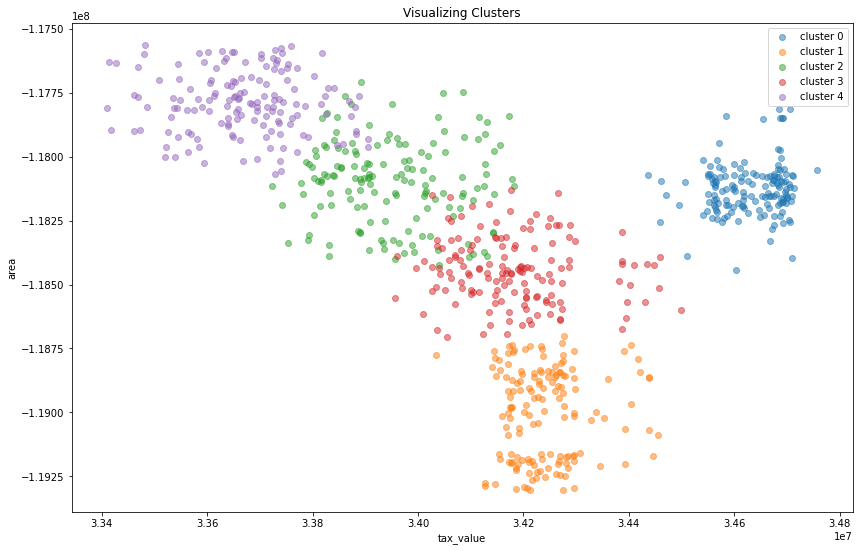

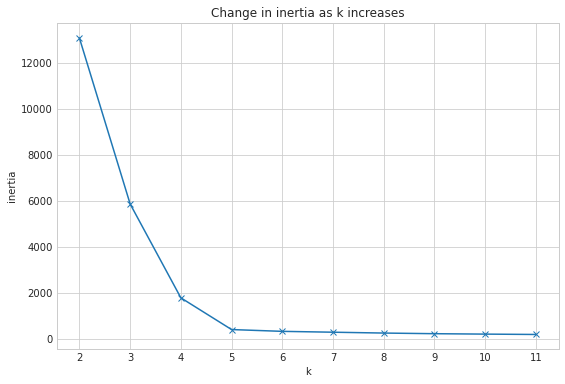

In [151]:
X = train[["lat","long", 'area', "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=5, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
plt.figure(figsize=(14, 9))
for cluster, subset in train.groupby('cluster'):
    
    # Here
    plt.scatter(subset.lat.sample(150), subset.long.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('latitude')
plt.ylabel('Longitude')
plt.title('Visualizing Clusters')
plt.show()

centroids = train.groupby('cluster')["lat","long", 'area', "price_per_sqft"].mean()
centroids

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
centroids = train.groupby('cluster')['area', 'price_per_sqft'].mean()
centroids

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
train.cluster.value_counts()

In [ ]:
cluster0 = train[train['cluster']==0]
cluster1 = train[train['cluster']==1]
cluster2 = train[train['cluster']==2]
cluster3 = train[train['cluster']==3]
cluster4 = train[train['cluster']==4]
cluster5 = train[train['cluster']==5]

In [ ]:
X = cluster0[["lat","long", 'area', "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=2, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
cluster0['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
plt.figure(figsize=(14, 9))
for cluster, subset in cluster0.groupby('cluster'):
    
    # Here
    plt.scatter(subset.lat.sample(150), subset.long.sample(150), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

centroids = train.groupby('cluster')["lat","long", 'area', "price_per_sqft"].mean()
centroids

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
X = cluster1[["lat","long", 'area', "price_per_sqft"]]
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
#define the thing
kmeans = KMeans(n_clusters=8, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)
cluster1['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
plt.figure(figsize=(14, 9))
for cluster, subset in cluster1.groupby('cluster'):
    
    # Here
    plt.scatter(subset.lat.sample(10), subset.long.sample(10), label='cluster ' + str(cluster), alpha=.5, cmap='reds')
    
    
plt.legend()
plt.xlabel('tax_value')
plt.ylabel('area')
plt.title('Visualizing Clusters')
plt.show()

centroids = train.groupby('cluster')["lat","long", 'area', "price_per_sqft"].mean()
centroids

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Checking clusters 

In [ ]:
train, validate, test = wrangle()

In [ ]:
train.cluster.value_counts()

In [ ]:
cluster0 = train[train.cluster ==0]
cluster1 = train[train.cluster ==1]
cluster2 = train[train.cluster ==2]
cluster3 = train[train.cluster ==3]
cluster4 = train[train.cluster ==4]

In [ ]:
c0_mean = cluster0.logerror.mean()
c1_mean = cluster1.logerror.mean()
c2_mean = cluster2.logerror.mean()
c3_mean = cluster3.logerror.mean()
c4_mean = cluster4.logerror.mean()


In [ ]:
cluster1.head(5)

In [ ]:
cluster1.logerror.hist()

In [ ]:
train.logerror.mean()

In [ ]:
train.logerror.hist()

In [ ]:
alpha =.05

## $H_0$ There is no difference in cluster 0 logerror mean than the overall logerror mean<br>
## $H_a$ There is a difference in cluster 0 logerror mean than the overall logerror mean

In [ ]:
c0 = cluster0.logerror
μ = train.logerror.mean()

t, p = stats.ttest_1samp(c0, μ) #1samp, 1 tailed, not independent

if (p < alpha):
    print("reject Null Hypothesis")
elif((t < 0)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

## $H_0$ There is no difference in cluster 1 mean than the overall logerror mean<br>
## $H_a$ There is a difference in cluster 1 logerror mean than the overall logerror mean

In [ ]:
c1 = cluster1.logerror
μ = train.logerror.mean()

t, p = stats.ttest_1samp(c1, μ) #1samp, 1 tailed, not independent

if (p < alpha):
    print("reject Null Hypothesis")
elif((t < 0)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

## $H_0$ There is no difference in cluster 2 mean than the overall logerror mean<br>
## $H_a$ There is a difference in cluster 2 logerror mean than the overall logerror mean

In [ ]:
c2 = cluster2.logerror
μ = train.logerror.mean()

t, p = stats.ttest_1samp(c2, μ) #1samp, 1 tailed, not independent

if (p < alpha):
    print("reject Null Hypothesis")
elif((t < 0)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

## $H_0$ There is no difference in cluster 3 mean than the overall logerror mean<br>
## $H_a$ There is a difference in cluster 3 logerror mean than the overall logerror mean

In [ ]:
c3 = cluster3.logerror
μ = train.logerror.mean()

t, p = stats.ttest_1samp(c3, μ) #1samp, 1 tailed, not independent

if (p < alpha):
    print("reject Null Hypothesis")
elif((t < 0)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

## $H_0$ There is no difference in cluster 4mean than the overall logerror mean<br>
## $H_a$ There is a difference in cluster 4 logerror mean than the overall logerror mean

In [ ]:
c4 = cluster4.logerror
μ = train.logerror.mean()

t, p = stats.ttest_1samp(c4, μ) #1samp, 1 tailed, not independent

if (p < alpha):
    print("reject Null Hypothesis")
elif((t < 0)):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

# Create Dummies

In [ ]:
t

In [ ]:
train.cluster.value_counts()

In [ ]:
train, validate, test = wrangle()

boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)


train = pd.concat([train, boolean_dummy], axis = 1)

train = train.rename(columns = {
        0:'cluster_1', 
        1:'cluster_2', 
        2:'cluster_3',
        3:'cluster_4',
        4:'cluster_5',})

In [ ]:
train

# Identiying clusters

In [ ]:
train.cluster.value_counts()

In [ ]:
train[train.cluster == 4].tax_value.median()

In [ ]:
train[train.cluster == 4].county.value_counts()

In [ ]:
train[train.cluster == 4].price_per_sqft.median()

In [ ]:
train[train.cluster == 4].lot_size.median()

In [ ]:
train[train.cluster == 4].area.median()

In [ ]:
train[train.cluster == 4].bed.median()

In [ ]:
train[train.cluster == 4].bath.median()

Cluster0 

- Smallest cluster
- Only in LA area
- median price of 184K
- median lot_size of 7509 sq ft
- median area of 1716 sq feet
- 3 bed
- 2 bath

Cluster1 

- Largest cluster
- Mostly in LA area
- median price of 311K
- median lot_size of 6300 sq ft
- median area of 1423sq feet
- 3 bed
- 2 bath

Cluster2 

- Mostly in Ventura area
- median price of 460K
- median lot_size of 7506 sq ft
- median area of 1924 sq feet
- 4 bed
- 2.5 bath

Cluster3 

- Mostly in LA area
- median price of 458K
- median lot_size of 7464 sq ft
- median area of 1764 sq feet
- 3 bed
- 2 bath

Cluster4

- Mostly in Orange County
- median price of 541K
- median lot_size of 6083 sq ft
- median area of 1988 sq feet
- 3 bed
- 2.5 bath
